*ZEKE*
# Assignment - 01
Analyze a given DNA sequence and perform basic sequence manipulation, including finding motifs, calculating GC content, and
identifying coding regions.

download FASTA for NCBI -> Select Gene selection -> search "NC_000019.10
" -> https://www.ncbi.nlm.nih.gov/gene/23149

reading DNA-sequence and displaying with some formatiing

In [12]:
with open("sequence.fasta") as file :
  lines = file.readlines()
  sequence = "".join(line.strip() for line in lines[1:])  # line.strip() removes leading a before white spaces.
  sequence = sequence.upper()
  print(sequence)

CTACTCAGCCCCAGCGGAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATGAGCTCAGGGGCCTCTAGAAAGAGCTGGGACCCTGGGAACCCCTGGCCTCCAGGTAGTCTCAGGAGAGCTACTCGGGGTCGGGCTTGGGGAGAGGAGGAGCGGGGGTGAGGCAAGCAGCAGGGGACTGGACCTGGGAAGGGCTGGGCAGCAGAGACGACCCGACCCGCTAGAAGGTGGGGTGGGGAGAGCAGCTGGACTGGGATGTAAGCCATAGCAGGACTCCACGAGTTGTCACTATCATTTATCGAGCACCTACTGGGTGTCCCCAGTGTCCTCAGATCTCCATAACTGGGGAGCCAGGGGCAGCGACACGGTAGCTAGCCGTCGATTGGAGAACTTTAAAATGAGGACTGAATTAGCTCATAAATGGAACACGGCGCTTAACTGTGAGGTTGGAGCTTAGAATGTGAAGGGAGAATGAGGAATGCGAGACTGGGACTGAGATGGAACCGGCGGTGGGGAGGGGGTGGGGGGATGGAATTTGAACCCCGGGAGAGGAAGATGGAATTTTCTATGGAGGCCGACCTGGGGATGGGGAGATAAGAGAAGACCAGGAGGGAGTTAAATAGGGAATGGGTTGGGGGCGGCTTGGTAAATGTGCTGGGATTAGGCTGTTGCAGATAATGCAACAAGGCTTGGAAGGCTAACCTGGGGTGAGGCCGGGTTGGGGCCGGGCTGGGGGTGGGAGGAGTCCTCACTGGCGGTTGATTGACAGTTTCTCCTTCCCCAGACTGGCCAATCACAGGCAGGAAGATGAAGGTTCTGTGGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGGCGGGGCTTGCTCGGTTCCCCCCGCTCCTCCCCCTCTCATCCTCACCTCAACCTCCTGGCCCCATTCAGGCAGACCCTGGGCCCCCTCTTCTGAGGCTTCTGTGCTGCTTCCTGGCTCTG

Motifs(short sequence)

Definition: A motif is a specific sequence pattern that is often associated with a particular function. For example, in proteins, motifs can indicate regions responsible for binding to DNA or other molecules.

# Types of Motifs:
1. Sequence Motifs: Short segments of nucleic acid or protein sequences that are conserved and often play a role in the structure or function of the molecule.

2. Structural Motifs: In proteins, these can refer to common structural elements like alpha helices and beta sheets that contribute to the overall shape and function of the protein.

In [10]:
import re
# string manupliation using re module (match.start : to get starting index & re.finditer to find non-overallping seq)

In [16]:
def find_motifs(sequence,motif) :
  print(f"Scanning motif : {motif}")
  matches = [match.start() for match in re.finditer(motif,sequence)]
  if matches :
    print(f"motif : {motif} at location : {matches}")
  else :
    print("No motif found !!")


motif = "TATAA"
find_motifs(sequence,motif)

Scanning motif : TATAA
motif : TATAA at location : [1799]


# GC Content
GC Content refers to the percentage of guanine (G) and cytosine (C) bases present in a DNA or RNA molecule.
+ It indicate propotion of particular base with whole bases.

# Why we calculate it?
1. Gene Regulation: GC content can influence how genes are expressed. Genes in GC-rich regions often have different regulatory mechanisms compared to those in AT-rich areas. Higher GC content is typically found in coding regions, while lower GC content may be present in non-coding regions.

2. Evolutionary Insights: Differences in GC content across species can provide clues about evolutionary adaptations and pressures that favor certain nucleotide compositions.

3. Disease Associations: Changes in GC content can be linked to certain diseases, including some cancers, making it a useful factor for diagnosis and treatment strategies.

# Formula :

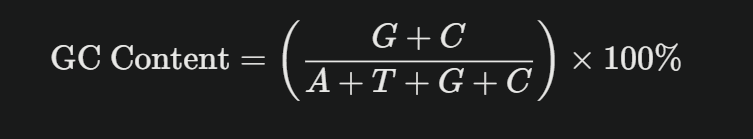

In [19]:
g_count = sequence.count("G")
c_count = sequence.count("C")
print("+-------------------+")
print("|count of G : ",g_count,"|")
print("|count of C : ",c_count,"|")
print("+-------------------+")

+-------------------+
|count of G :  1130 |
|count of C :  1067 |
+-------------------+


In [22]:
GC_content = (g_count + c_count) / len(sequence) * 100
print(f"GC_Content : {GC_content}%")

GC_Content : 61.06170094496943%


# Extra

AT Content

AT Content refers to the percentage of adenine (A) and thymine (T) bases in a DNA molecule. It is calculated similarly to GC content

# Why we calculate?
1. Genomic Characteristics:
AT-rich regions are often found in promoter regions, which are crucial for gene regulation. These regions may be more accessible for transcription factors, influencing gene expression.


2. Thermal Stability:
DNA with high AT content is generally less thermally stable than GC-rich DNA because A-T pairs form only two hydrogen bonds, while G-C pairs form three. This can affect the stability of the DNA under different environmental conditions.

3. Gene Regulation:
The presence of AT-rich sequences can influence the binding of regulatory proteins and the overall expression of genes. Genes in AT-rich regions may have different regulatory mechanisms compared to those in GC-rich areas.


In [24]:
a_count = sequence.count("A")
t_count = sequence.count("T")
print("+-------------------+")
print("|count of A : ",a_count,"|")
print("|count of T : ",t_count,"|")
print("+-------------------+")

AT_content = (a_count + t_count) / len(sequence) * 100
print(f"AT_Content : {AT_content}%")

+-------------------+
|count of A :  667 |
|count of T :  734 |
+-------------------+
AT_Content : 38.938299055030576%


# Purine Ratio

The purine ratio refers to the ratio of purine bases (adenine and guanine) compared to pyrimidine bases (cytosine and thymine) in a DNA or RNA sequence.

# Why we calculate?

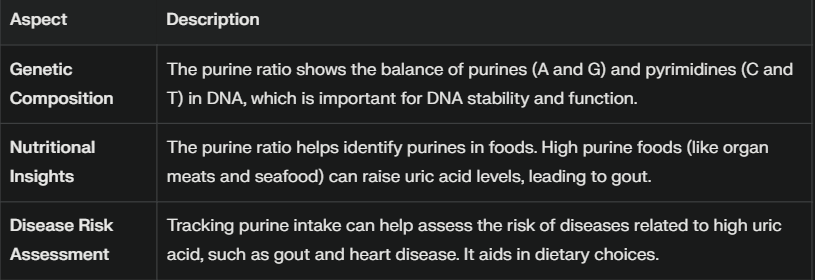


# Formula
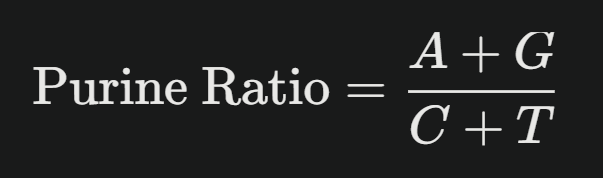

In [25]:
purine_ratio = (a_count + g_count) / (c_count + t_count)
print(f"Purine ratio : {purine_ratio}")

Purine ratio : 0.9977790116601888


# Identifying coding regions
+ Definition - Coding regions, also known as coding sequences (CDS), are segments of DNA or RNA that are transcribed and translated into proteins.

+ Function - The primary role of coding regions is to provide the necessary information to produce proteins, which perform various functions in the body, such as building tissues, facilitating chemical reactions.

+ Transcription and Translation:
1. Coding regions are first transcribed into messenger RNA (mRNA).
2. The mRNA is then translated into a sequence of amino acids to form a protein.

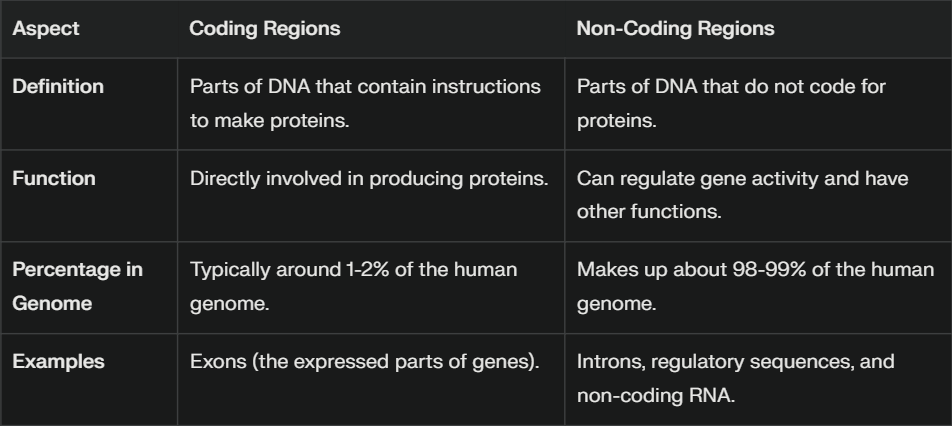

1. Start codons - A sequence in mRNA that signals the start of protein synthesis. ATG

2. Stop codons - A sequence in mRNA that signals the end of protein synthesis.
TAA, TAG, TGA

In [52]:
start_codon = "ATG"
stop_codon = ["TAA","TAG","TGA"]
coding_regions = []
start_index = sequence.find(start_codon)
print(f"ATG start at : {start_index}")

ATG start at : 73


In [55]:
while start_index != -1 : # loop until all are not found.
  for stop_codons in stop_codon : # traversing through stop_codon = ["TAA","TAG","TGA"]
    stop_index = sequence.find(stop_codons,start_index + 3) # finding stop_index.
    # start_index + 3 :
    '''
    Example :
    start_codon = ATG | Position is 0
    stop_codon = TAG
    sequence = ATGAAAAATAG
    But we want to find stop_index after ATG that is 2. means search start from 3. that's why 0 + 3 = 3
    so start from 3 and search for TAG.
    '''
    if stop_index != -1 and (stop_index - start_index) % 3 == 0 : # Confirming
      '''
      As standard coding_region is divisible by 3, cause it carries 3 bases ATG or any other.
      '''
      coding_region = sequence[start_index:stop_index + 3] # Extracting sequence (coding region)
      coding_regions.append(coding_region) # Storing is list
      break

  # Updating our start_index from 73 to next
  start_index = sequence.find(start_codon, start_index + 1) # updated to new coding region search.

if coding_region :
  print("---------------- Coding region found -----------------")
  for i, coding_region in enumerate(coding_regions, start=1) :
    print(f"Coding region {i} : {coding_region} Length : {len(coding_region)}")
else :
  print("No coding region found")

---------------- Coding region found -----------------
Coding region 1 : ATGAGCTCAGGGGCCTCTAGAAAGAGCTGGGACCCTGGGAACCCCTGGCCTCCAGGTAGTCTCAGGAGAGCTACTCGGGGTCGGGCTTGGGGAGAGGAGGAGCGGGGGTGAGGCAAGCAGCAGGGGACTGGACCTGGGAAGGGCTGGGCAGCAGAGACGACCCGACCCGCTAGAAGGTGGGGTGGGGAGAGCAGCTGGACTGGGATGTAA Length : 210
Coding region 2 : ATGTAA Length : 6
Coding region 3 : ATGGAACACGGCGCTTAA Length : 18
Coding region 4 : ATGTGAAGGGAGAATGAGGAATGCGAGACTGGGACTGAGATGGAACCGGCGGTGGGGAGGGGGTGGGGGGATGGAATTTGAACCCCGGGAGAGGAAGATGGAATTTTCTATGGAGGCCGACCTGGGGATGGGGAGATAAGAGAAGACCAGGAGGGAGTTAAATAG Length : 165
Coding region 5 : ATGAGGAATGCGAGACTGGGACTGAGATGGAACCGGCGGTGGGGAGGGGGTGGGGGGATGGAATTTGAACCCCGGGAGAGGAAGATGGAATTTTCTATGGAGGCCGACCTGGGGATGGGGAGATAA Length : 126
Coding region 6 : ATGCGAGACTGGGACTGA Length : 18
Coding region 7 : ATGGAACCGGCGGTGGGGAGGGGGTGGGGGGATGGAATTTGAACCCCGGGAGAGGAAGATGGAATTTTCTATGGAGGCCGACCTGGGGATGGGGAGATAAGAGAAGACCAGGAGGGAGTTAAATAG Length : 126
Coding region 8 : ATGGAATTTGAACCCCGGGAGAGGAAGATGGAATTTTC